Mutation Analysis Summary Table:
Mutation original mutant  original_charge  mutant_charge  net_charge_change  Distance  dG_electric  is_neutral
    R99C        R      C                1              0                 -1    8.8934    -0.112443       False
   H177Q        H      Q                1              0                 -1   11.6461    -0.085866       False
   H144Q        H      Q                1              0                 -1   11.8837    -0.084149       False
    K87T        K      T                1              0                 -1   15.7073    -0.063665       False
   R181S        R      S                1              0                 -1   18.7941    -0.053208       False
     S4R        S      R                0              1                  1   19.4255     0.051479       False
   E143S        E      S               -1              0                  1   16.8112     0.059484       False
    A74G        A      G                0              0                  0   2

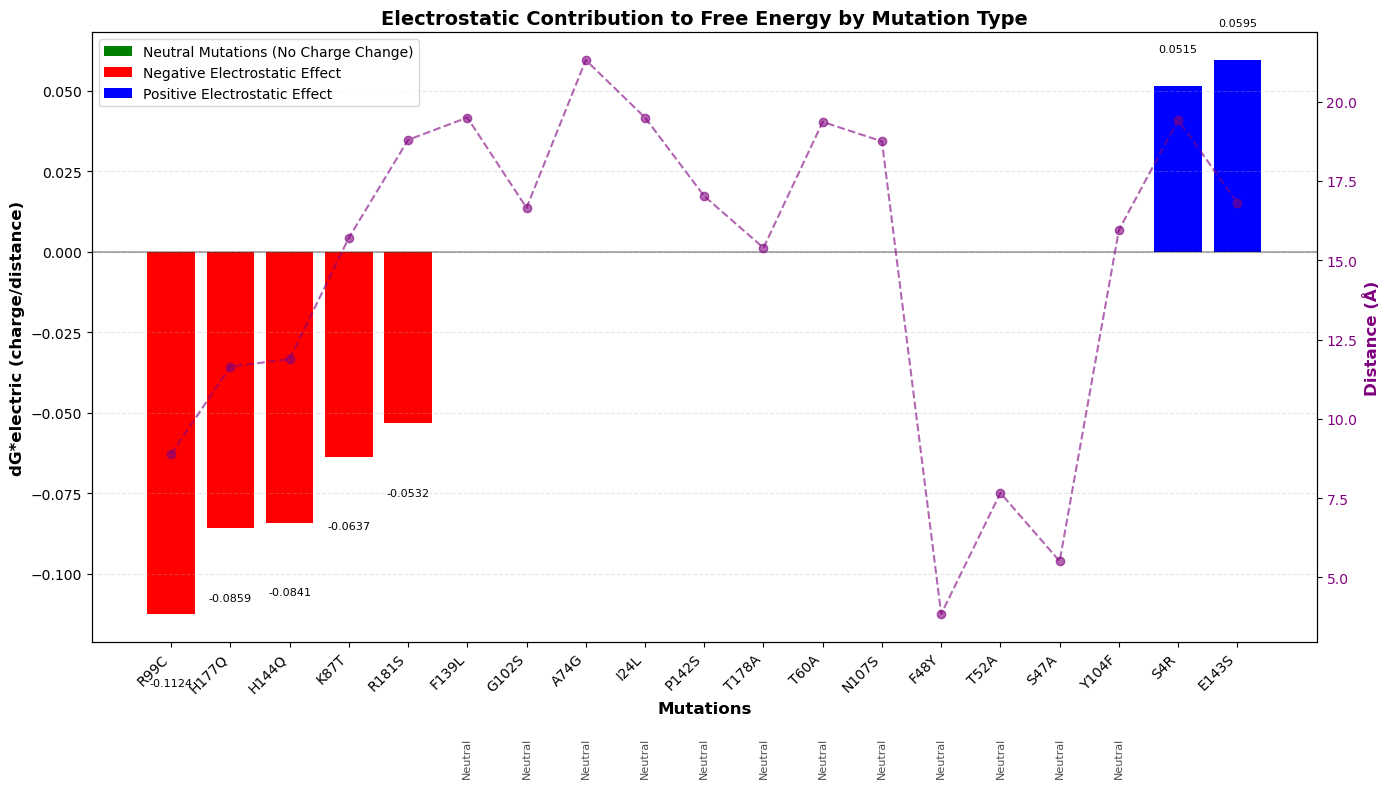

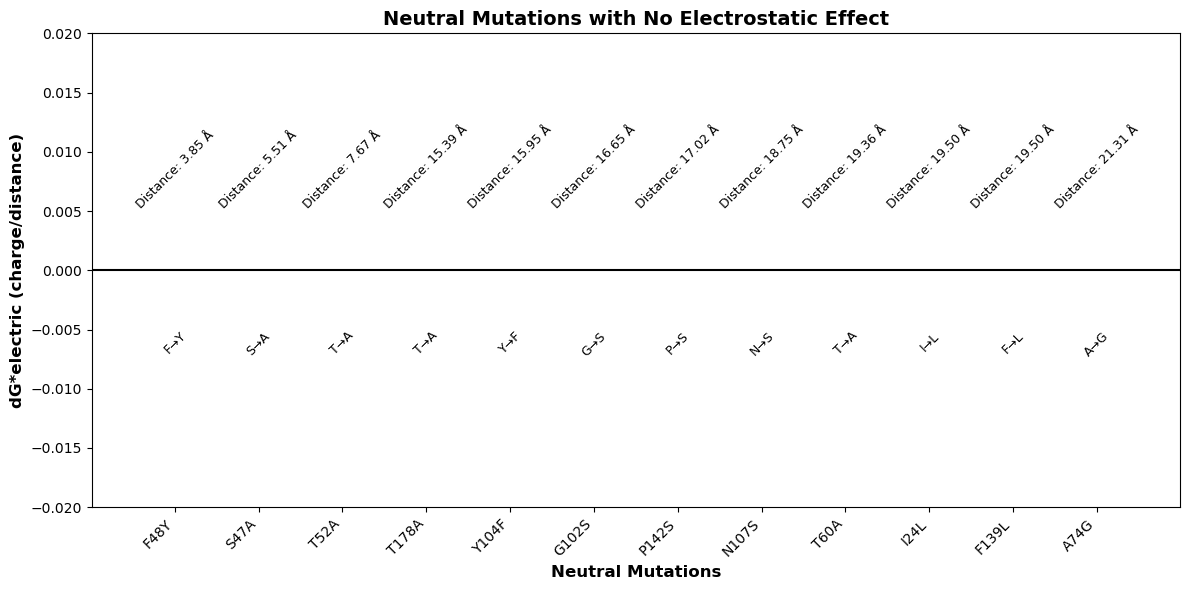

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the data
data = [
    {"Mutation": "A74G", "Position": 74, "Distance": 21.3106, "Charge": -1, "dG_star": 17.88},
    {"Mutation": "F139L", "Position": 139, "Distance": 19.4989, "Charge": 0, "dG_star": 17.01},
    {"Mutation": "G102S", "Position": 102, "Distance": 16.6526, "Charge": 0, "dG_star": 18.72},
    {"Mutation": "H177Q", "Position": 177, "Distance": 11.6461, "Charge": 0, "dG_star": 16.09},
    {"Mutation": "K87T", "Position": 87, "Distance": 15.7073, "Charge": 1, "dG_star": 20.21},
    {"Mutation": "P142S", "Position": 142, "Distance": 17.0211, "Charge": 0, "dG_star": 18.3},
    {"Mutation": "R99C", "Position": 99, "Distance": 8.8934, "Charge": 1, "dG_star": 17.29},
    {"Mutation": "S4R", "Position": 4, "Distance": 19.4255, "Charge": 0, "dG_star": 15.73},
    {"Mutation": "T178A", "Position": 178, "Distance": 15.3922, "Charge": 0, "dG_star": 15.41},
    {"Mutation": "T60A", "Position": 60, "Distance": 19.3621, "Charge": 0, "dG_star": 19.22},
    {"Mutation": "E143S", "Position": 143, "Distance": 16.8112, "Charge": -1, "dG_star": 17.52},
    {"Mutation": "F48Y", "Position": 48, "Distance": 3.8482, "Charge": 0, "dG_star": 17.16},
    {"Mutation": "H144Q", "Position": 144, "Distance": 11.8837, "Charge": 0, "dG_star": 16.6},
    {"Mutation": "I24L", "Position": 24, "Distance": 19.4986, "Charge": 0, "dG_star": 17.88},
    {"Mutation": "N107S", "Position": 107, "Distance": 18.7479, "Charge": 0, "dG_star": 21.25},
    {"Mutation": "R181S", "Position": 181, "Distance": 18.7941, "Charge": 1, "dG_star": 19.38},
    {"Mutation": "S47A", "Position": 47, "Distance": 5.5122, "Charge": 0, "dG_star": 19.07},
    {"Mutation": "T52A", "Position": 52, "Distance": 7.666, "Charge": 0, "dG_star": 17.83},
    {"Mutation": "Y104F", "Position": 104, "Distance": 15.951, "Charge": 0, "dG_star": 15.75}
]

# Create a DataFrame
df = pd.DataFrame(data)

# Define amino acid charges
def get_amino_acid_charge(aa):
    positive = ['R', 'K', 'H']
    negative = ['D', 'E']
    if aa in positive:
        return 1
    elif aa in negative:
        return -1
    else:
        return 0

# Analyze mutations
def analyze_mutation(mutation):
    original = mutation[0]
    mutant = mutation[-1]
    
    original_charge = get_amino_acid_charge(original)
    mutant_charge = get_amino_acid_charge(mutant)
    net_charge_change = mutant_charge - original_charge
    
    # Check if mutation is neutral (no charge change)
    is_neutral = (original_charge == 0 and mutant_charge == 0)
    
    return {
        'original': original,
        'mutant': mutant,
        'original_charge': original_charge,
        'mutant_charge': mutant_charge,
        'net_charge_change': net_charge_change,
        'is_neutral': is_neutral
    }

# Apply analysis to each mutation
charge_analysis = [analyze_mutation(mutation) for mutation in df['Mutation']]
charge_df = pd.DataFrame(charge_analysis)

# Combine with original data
df = pd.concat([df, charge_df], axis=1)

# Calculate dG*electric using Coulomb's law
df['dG_electric'] = df['net_charge_change'] / df['Distance']

# Create a new figure
plt.figure(figsize=(14, 8))

# Sort data for better visualization
df_sorted = df.sort_values('dG_electric')

# Create color mapping based on charge changes and neutrality
colors = []
for _, row in df_sorted.iterrows():
    if row['is_neutral']:
        colors.append('green')  # Neutral mutations
    elif row['dG_electric'] < 0:
        colors.append('red')    # Negative electrostatic effect
    else:
        colors.append('blue')   # Positive electrostatic effect

# Plot all mutations with different colors
bars = plt.bar(df_sorted['Mutation'], df_sorted['dG_electric'], color=colors)

# Add horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Customize the plot
plt.xlabel('Mutations', fontsize=12, fontweight='bold')
plt.ylabel('dG*electric (charge/distance)', fontsize=12, fontweight='bold')
plt.title('Electrostatic Contribution to Free Energy by Mutation Type', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', label='Neutral Mutations (No Charge Change)'),
    Patch(facecolor='red', label='Negative Electrostatic Effect'),
    Patch(facecolor='blue', label='Positive Electrostatic Effect')
]
plt.legend(handles=legend_elements, loc='best')

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    if height != 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + (0.01 if height > 0 else -0.02),
            f'{height:.4f}',
            ha='center',
            va='bottom' if height > 0 else 'top',
            fontsize=8
        )

# Add a secondary plot showing distance for context
ax2 = plt.twinx()
df_sorted['Distance_scaled'] = df_sorted['Distance'] / max(df_sorted['Distance']) * max(abs(df_sorted['dG_electric'])) * 0.8
ax2.plot(df_sorted['Mutation'], df_sorted['Distance'], 'o--', color='purple', alpha=0.6, label='Distance (Å)')
ax2.set_ylabel('Distance (Å)', color='purple', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='purple')

# Add neutral mutation text annotations
for i, (idx, row) in enumerate(df_sorted.iterrows()):
    if row['is_neutral']:
        plt.text(i, -0.02, 'Neutral', rotation=90, ha='center', va='top', fontsize=8, alpha=0.7)

plt.tight_layout()

# Create a separate figure just for neutral mutations
plt.figure(figsize=(12, 6))

# Filter for neutral mutations only
neutral_df = df[df['is_neutral']]
neutral_df = neutral_df.sort_values('Distance')  # Sort by distance

# Plot neutral mutations
bars = plt.bar(neutral_df['Mutation'], [0] * len(neutral_df), color='green', alpha=0.7)

# Customize the plot
plt.xlabel('Neutral Mutations', fontsize=12, fontweight='bold')
plt.ylabel('dG*electric (charge/distance)', fontsize=12, fontweight='bold')
plt.title('Neutral Mutations with No Electrostatic Effect', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-')

# Add distance labels above each bar
for i, (idx, row) in enumerate(neutral_df.iterrows()):
    plt.text(i, 0.005, f"Distance: {row['Distance']:.2f} Å", ha='center', va='bottom', rotation=45, fontsize=9)
    plt.text(i, -0.005, f"{row['original']}→{row['mutant']}", ha='center', va='top', rotation=45, fontsize=9)

plt.ylim(-0.02, 0.02)  # Set y-axis limits for better visualization
plt.tight_layout()

# Create a summary table for all mutations
summary_df = df[['Mutation', 'original', 'mutant', 'original_charge', 'mutant_charge', 
                'net_charge_change', 'Distance', 'dG_electric', 'is_neutral']]
                
print("Mutation Analysis Summary Table:")
print(summary_df.sort_values(['is_neutral', 'dG_electric']).to_string(index=False))

print("\nNeutral Mutations (No Electrostatic Effect):")
print(neutral_df[['Mutation', 'original', 'mutant', 'Distance']].to_string(index=False))